### Support Vector Classifier Task

#### 심장마비 가능성 예측


#### feature
- age: 환자의 나이  
- sex: 환자의 성별 (0 = female, 1 = male).  
- cp: 흉통성 (1 = typical angina(전형 협심증), 2 = atypical angina(비전형 협심증), 3 = non-anginal pain(비협심증), 4 = asymptomatic(무증상))  
- trestbps: 정지 혈압(mmHg)  
- chol: 혈청 콜레스테롤 수치(mg/dl)  
- fbs: 공복혈당 (> 120mg/dl) (1 = true, 0 = false)  
- restecg: 정지 심전도 결과 (0 = normal, 1 = having ST-T wave abnormality(ST-T파 이상), 2 = probable or definite left ventricular hypertrophy(좌심실 비대 가능성 또는 확실성))  
- thalach: 최대 심박수  
- exang: 운동 유발 협심증 (1 = yes, 0 = no)  
- oldpeak: 휴식과 관련된 운동으로 인한 ST 우울증  
- slope: 피크 운동 ST 세그먼트의 기울기  
- ca: 형광 투시법으로 채색된 주요 혈관의 수  
- thal: 탈라세미아(혈액장애의 일종) results (3 = normal, 6 = fixed defect(고정결함), 7 = reversible defect(가역결함))  

#### target
- output : 1 = 심장마비 존재, 0 = 심장마비 없음

In [1]:
import pandas as pd

# 데이터 호출
h_df = pd.read_csv('./datasets/heart.csv')

### Ⅰ. 데이터 탐색

#### 📊 데이터 정보 확인

In [2]:
# 데이터 정보
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Ⅱ. 데이터 전처리

#### 📊 데이터 중복행 제거

In [3]:
# 데이터 중복행 삭제
h_df.drop_duplicates(inplace=True)
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# 데이터 인덱스 번호 재설정
h_df.reset_index(drop=True, inplace=True)
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### 📊 데이터 간 상관관계 확인

Text(0.5, 1.0, 'Correlation')

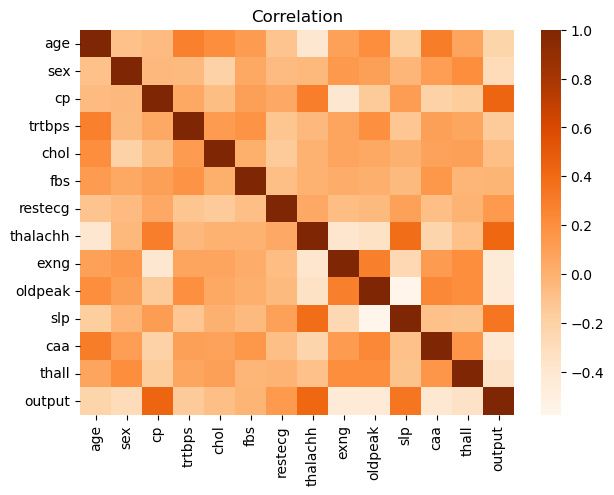

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계의 지수 확인
corr = h_df.corr()

# 그래프 사이즈 조절
fig = plt.figure(figsize=(7, 5))

# 상관관계 히트맵으로 확인
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")

In [6]:
# 피처와 타겟의 상관관계 값을 확인
corr[['output']].sort_values(by="output", ascending=False)[1:]

,output
cp,0.432080
thalachh,0.419955
slp,0.343940
restecg,0.134874
fbs,-0.026826
chol,-0.081437
trtbps,-0.146269
age,-0.221476
sex,-0.283609
thall,-0.343101


In [7]:
# 타겟의 데이터 값 개수 확인
h_df.output.value_counts()

output
1    164
0    138
Name: count, dtype: int64

#### 📊 데이터 이상치 제거

In [8]:
from sklearn.preprocessing import StandardScaler

# 피처 데이터 분리
features = h_df.iloc[:, :-1]

# 표준화 처리 스케일링 모델
std = StandardScaler()
# 표준화 처리
std_features = std.fit_transform(features)
# 새로운 데이터 프레임에 담기
std_under_h_df = pd.DataFrame(std_features, columns=features.columns)
# 타겟 데이터 담기
std_under_h_df['output'] = h_df.output
# 데이터 프레임의 모양 확인 (행 개수, 열 개수)
std_under_h_df.shape

(302, 14)

In [9]:
columns = ['thalachh', 'oldpeak', 'slp']

for column in columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')

thalachh: 12건
oldpeak: 17건
slp: 21건


In [10]:
columns = ['thalachh', 'oldpeak', 'slp']

# 각 컬럼의 이상치를 반복문을 사용하여 제거
for column in columns:
    std_under_h_df.drop(
        std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
# 남아있는 이상치가 있는지 확인
for column in columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')

thalachh: 0건
oldpeak: 0건
slp: 0건


In [11]:
# 정상 데이터만 유지한 후 인덱스 초기화
under_h_df = h_df.iloc[std_under_h_df.index].reset_index(drop=True)
under_h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
2,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
3,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
258,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
259,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
260,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### 📊 타겟 비중 맞추기

In [12]:
# 타겟의 비중 확인
under_h_df.output.value_counts()

output
1    153
0    109
Name: count, dtype: int64

In [13]:
# 타겟의 데이터 개수 맞추기
output1 = under_h_df[under_h_df.output == 1].sample(109, random_state=124)
output0 = under_h_df[under_h_df.output == 0]

under_h_df = pd.concat([output1, output0]).reset_index(drop=True)

#### 📊 데이터 분포 확인

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

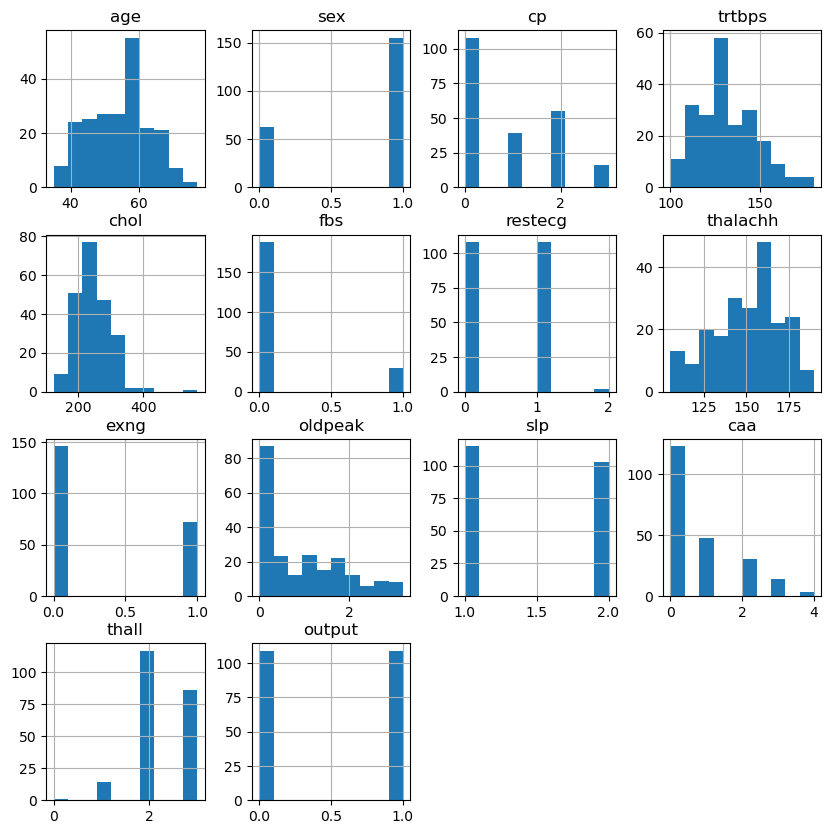

In [14]:
# 컬럼 별 분포를 히스토그램으로 확인
under_h_df.hist(figsize=(10, 10))

In [15]:
# 특정 피처의 비중 맞추기
oldpeak0 = under_h_df[under_h_df.oldpeak == 0].sample(12, random_state=124)
oldpeak = under_h_df[under_h_df.oldpeak != 0]
# 비중을 맞춰 데이터 프레임에 적용하고 인덱스 번호 초기화
under_h_df = pd.concat([oldpeak, oldpeak0]).reset_index(drop=True)
under_h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
1,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
2,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
3,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
4,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
158,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
159,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
160,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1


#### 📊 데이터 로그 변환 확인

<Axes: >

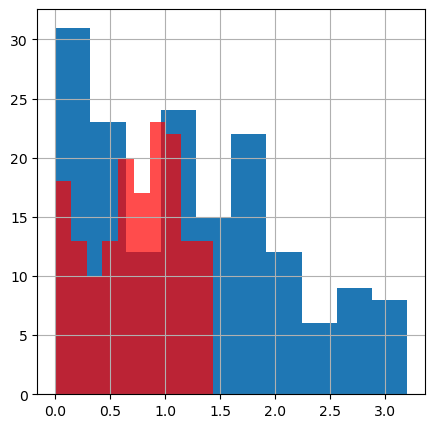

In [16]:
import numpy as np

under_h_df.oldpeak.hist(figsize=(5, 5))
np.log1p(under_h_df.oldpeak).hist(figsize=(5, 5), alpha=0.7, color="red")

<Axes: >

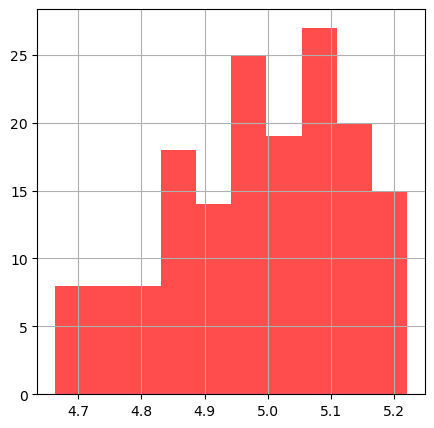

In [17]:
import numpy as np

np.log1p(under_h_df.thalachh).hist(figsize=(5, 5), alpha=0.7, color="red")

<Axes: >

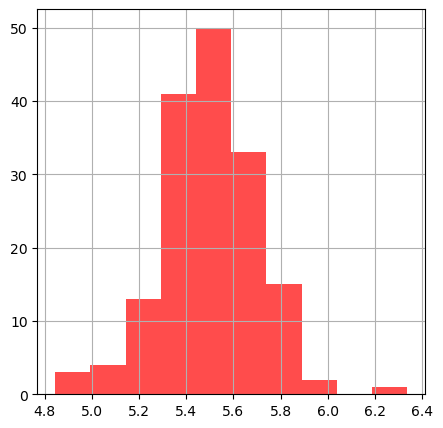

In [18]:
import numpy as np

np.log1p(under_h_df.chol).hist(figsize=(5, 5), alpha=0.7, color="red")

In [19]:
# 로그 변환
# 각 열의 값에 대해 자연로그에 1씩 더한 값을 계산하여, 분포의 왜곡을 줄임 (분포가 한쪽으로 치우친 경우에 유용함)
under_h_df.oldpeak = np.log1p(under_h_df.oldpeak)
under_h_df.thalachh = np.log1p(under_h_df.thalachh)
under_h_df.chol = np.log1p(under_h_df.chol)

# Tip
# log 사용하는 이유: 데이터의 분포를 더 잘 이해하고 모델이 더 잘 학습하도록 도움

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

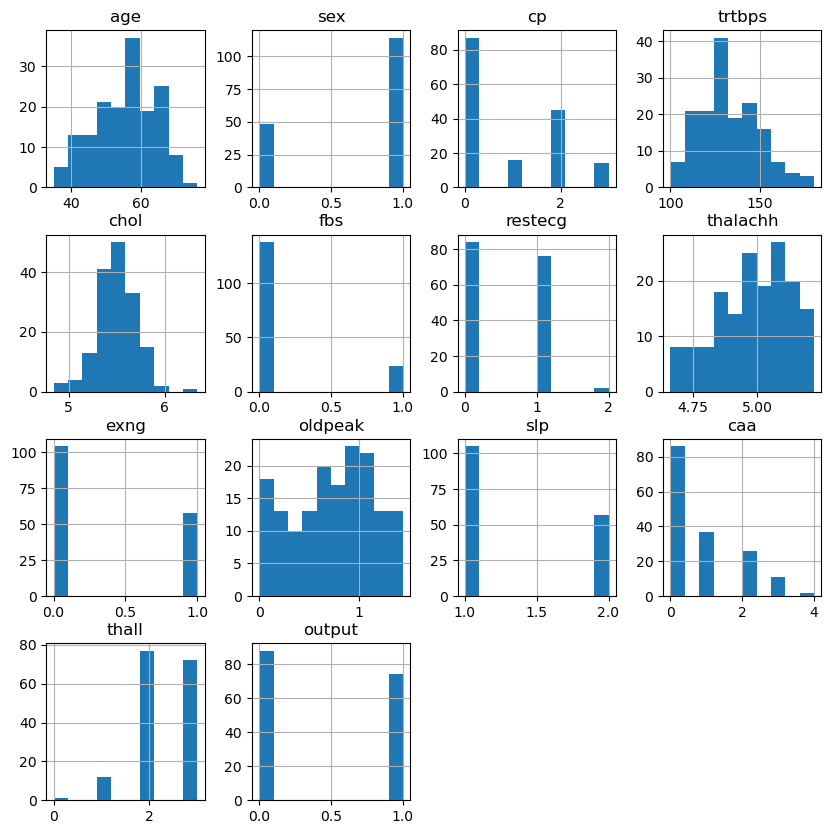

In [20]:
# 각 컬럼 별 분포 재확인
under_h_df.hist(figsize=(10, 10))

### Ⅲ. 데이터 세트 분리 및 훈련

#### 📊 데이터 세트 분리 및 훈련

In [21]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

# 피처, 타겟 데이터 분리
features, targets = under_h_df.iloc[:, :-1], under_h_df.iloc[:, -1]

# 문제/정답 및 학습/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 파라미터 값 설정
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

# 학습 및 교차검증 모델 설정
g_svc = GridSearchCV(SVC(probability=True), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

# 훈련
g_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [22]:
# 결과 값 보고 싶은 컬럼만 추출하여 새로운 데이터 프레임에 담기
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}",0.744615,28
1,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.542769,42
2,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}",0.744615,28
3,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.542769,42
4,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}",0.744615,28
5,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.542769,42
6,"{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}",0.744615,28
7,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.542769,42
8,"{'C': 0.01, 'gamma': 10, 'kernel': 'linear'}",0.744615,28
9,"{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}",0.542769,42


### Ⅳ. 오차행렬 및 예측

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

#### 📊 데이터 예측

In [24]:
# 최적의 모델 담기
svc = g_svc.best_estimator_
# 예측
prediction = g_svc.predict(X_test)

#### 📊 오차행렬

오차 행렬
[[12  6]
 [ 3 12]]
정확도: 0.7273, 정밀도: 0.6667, 재현율: 0.8000, F1: 0.7273, ROC-AUC: 0.7333
################################################################################


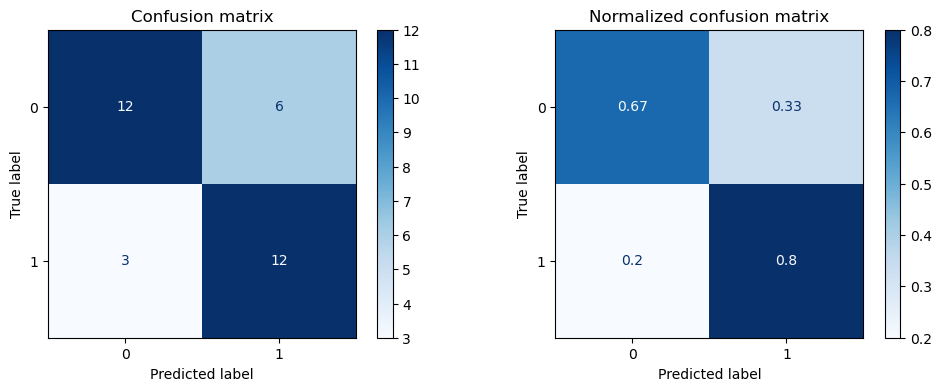

In [25]:
get_evaluation(y_test, prediction, svc, X_test)

### Ⅴ. 조정

#### 📊 데이터 조정 후 2차 학습

In [26]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 피처, 타겟 데이터 분리
features, targets = under_h_df.iloc[:, :-1], under_h_df.iloc[:, -1]

# 문제/정답 및 학습/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 파라미터 값 설정
parameters = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

# 전처리 → 분류
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', SVC(probability=True))])

# 학습 및 교차 검증 모델 설정
g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv=5, refit=True, return_train_score=True)
# 훈련
g_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [27]:
# 보고 싶은 결과 값 컬럼만 추출하여 새로운 데이터 프레임에 담기
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
# print(result_df['params'][67])
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...",0.845231,4
1,"{'svc__C': 0.01, 'svc__gamma': 0.001, 'svc__ke...",0.542769,44
2,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.845231,4
3,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.542769,44
4,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.845231,4
5,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.542769,44
6,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.845231,4
7,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.542769,44
8,"{'svc__C': 0.01, 'svc__gamma': 10, 'svc__kerne...",0.845231,4
9,"{'svc__C': 0.01, 'svc__gamma': 10, 'svc__kerne...",0.542769,44


#### 📊 데이터 예측

In [28]:
# 최적의 모델 담기
svc = g_svc.best_estimator_
# 예측
prediction = g_svc.predict(X_test)

#### 📊 오차행렬

오차 행렬
[[10  8]
 [ 5 10]]
정확도: 0.6061, 정밀도: 0.5556, 재현율: 0.6667, F1: 0.6061, ROC-AUC: 0.6111
################################################################################


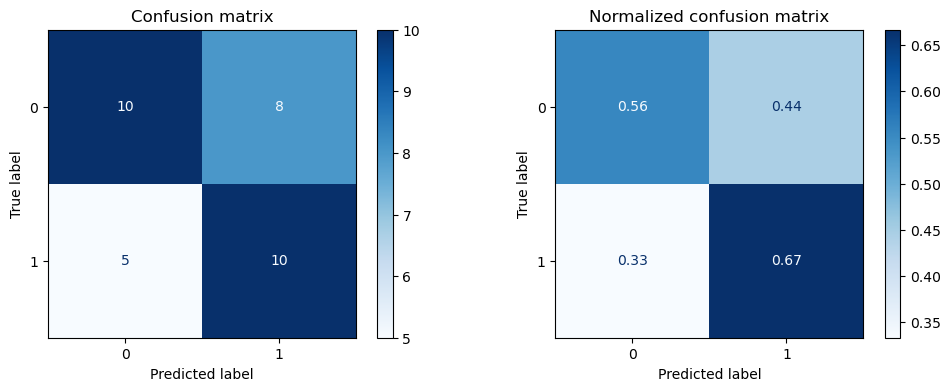

In [29]:
# 오차행렬
get_evaluation(y_test, prediction, svc, X_test)

#### 📌 결론
feature별 데이터 분포를 조정했다면, 다시 표준화 진행 시 패턴의 방향성을 잃게 되어 성능이 더 떨어질 수 있다.  
스케일링이 항상 옳은 것만은 아니다.

#### 📊 순열 중요도 확인

In [30]:
from sklearn.inspection import permutation_importance

# 주어진 모델과 테스트 데이터에 대한 순열 중요도를 계산
# n_repeats: 각 피처의 중요도를 평가할 때 섞는 횟수를 지정
importance = permutation_importance(svc, X_test, y_test, n_repeats=30, random_state=124)
# 평균을 내림차순으로 정렬하여 각 피처의 중요도 순위를 반환
importance.importances_mean.argsort()[::-1]

array([ 1, 11,  5,  0,  3,  7,  2,  8, 12,  4,  9, 10,  6], dtype=int64)

In [31]:
# 모델의 각 피처별 중요도 확인
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

sex: 0.0111
caa: 0.002
fbs: -0.001
age: -0.0101
trtbps: -0.0152
thalachh: -0.0242
cp: -0.0374
exng: -0.0374
thall: -0.0444
chol: -0.0505
oldpeak: -0.0515
slp: -0.0697
restecg: -0.0848
